# Intro to Language Models

## Load the Data

In [34]:
# Load the names.txt file
words = open("data/names.txt", "r").read().splitlines()

In [35]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

## BiGram Model
- A bigram is a pair of 2 consecutive words or characters. A bigram model looks at the probability of a word given the previous word.
- A bigram language model is a statistical model that predicts the next word in a sequence based on the immediately preceding word. It uses the probability of a word given its predecessor. The model is part of n-gram models where n=2.
$$
P(w_1, w_2, ..., w_n) = \frac{Count(w_{t-1}, w_t)}{Count(w_{t-1})}
$$

In [36]:
# Create a counter for all bigrams with start and end characters
b = {}
for w in words:
    # Add a start and end character to the bigrams
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [37]:
# sort the bigrams by frequency from most likely pairs to least likely
sorted(b.items(),key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [38]:
sorted(list(set("".join(words))))

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [39]:
import torch

In [40]:
# We will create a multidimensional array to represent the bigram counts instead of a dictionary.
# The dimensions of the array will be 28x28, one for each character in the alphabet plus the start and end characters.
N = torch.zeros((28,28), dtype=torch.int32)

In [41]:
# get all the unique characters in the dataset
chars = sorted(list(set("".join(words))))

# We need to convert characters to integers and we do this by creating a lookup table that maps the character to an integer.

char_to_int = {ch: i for i, ch in enumerate(chars)}
char_to_int["<S>"] = 26
char_to_int["<E>"] = 27

In [24]:
# Create the bigram count array
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        index1 = char_to_int[ch1] 
        index2 = char_to_int[ch2]
        N[index1, index2] += 1

In [42]:
# Visualize the array using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# create an inverted mapping from integers to characters for visualization
int_to_char = {i: ch for ch, i in char_to_int.items()}

(-0.5, 27.5, 27.5, -0.5)

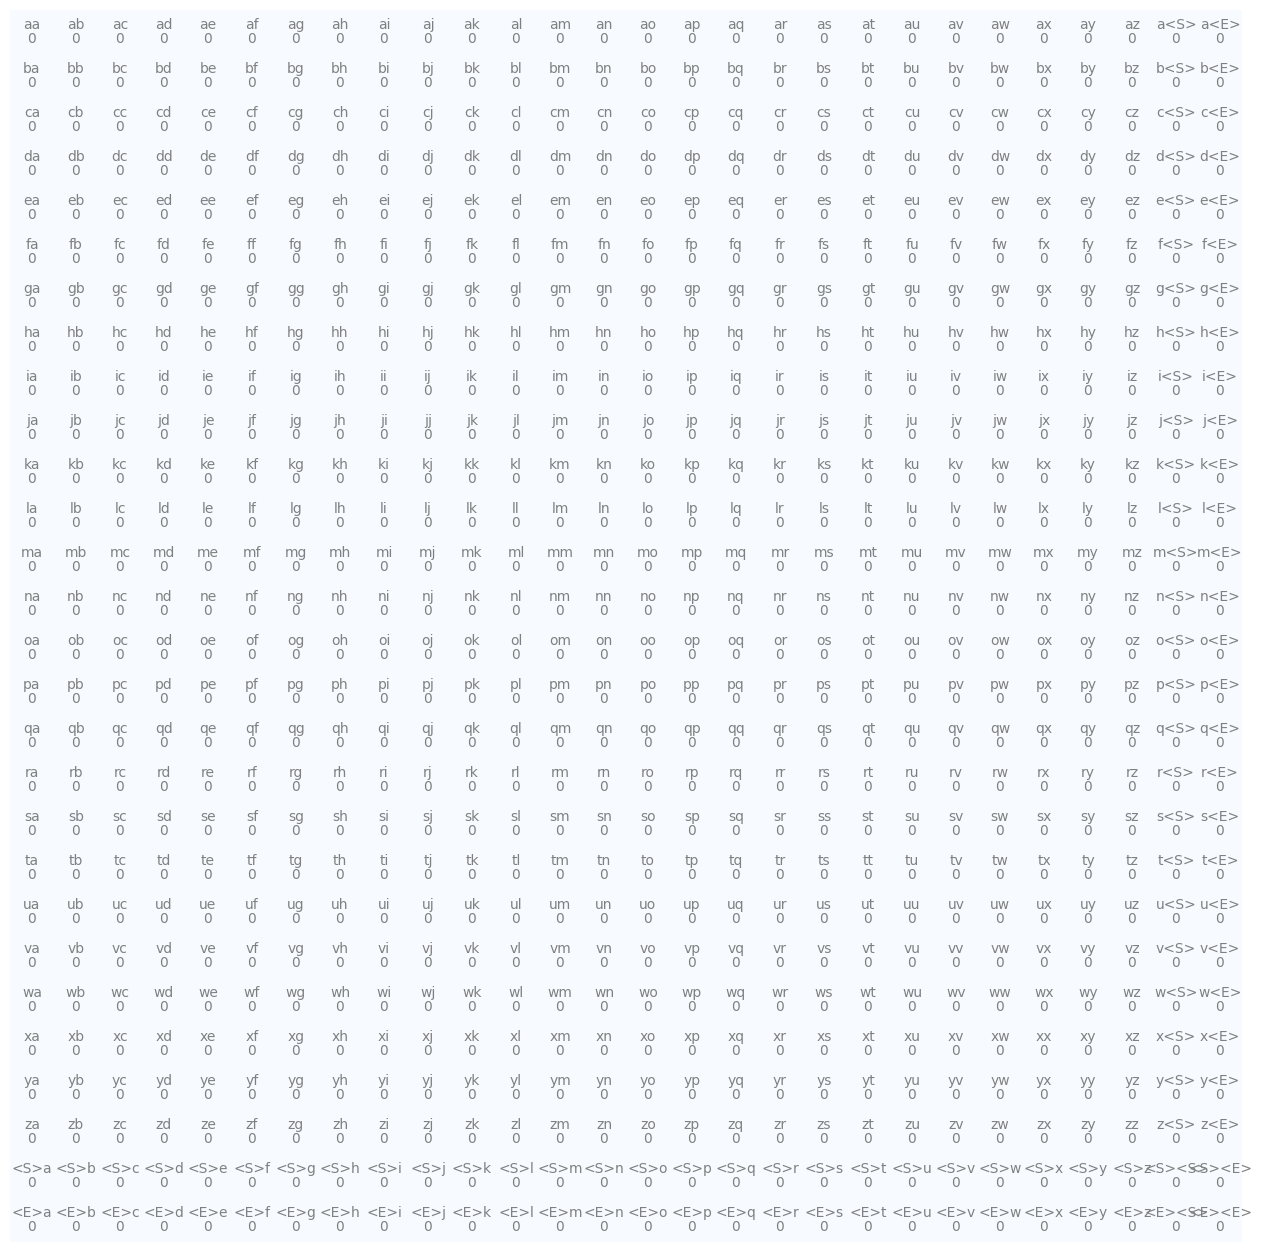

In [44]:
# set figure size
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

# iterate over the array and add the count as text in each cell
for i in range(28):
    for j in range(28):
        chrstr = int_to_char[i] + int_to_char[j]
        # add the text to the cell
        plt.text(j, i, chrstr, ha='center', va='bottom', color='gray')
        # add the count as text to the cell below the text
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [45]:
# As we know that <E> is the last character in the word, and cannot come before any other character, so its occurrence is 0, we can remove all bigrams that start with <E>.
# similarly, we can remove all bigrams that end with <S> as <S> is the first character in the word and cannot come after any other character.
# We will replace the characters <S> and <E> with . which will remove the rows with 0 probabilities.

# get all the unique characters in the dataset
chars = sorted(list(set("".join(words))))

# We need to convert characters to integers and we do this by creating a lookup table that maps the character to an integer.
# For the sake of convenience we will make . as 0 and start the rest of the characters from 1.

char_to_int = {ch: i + 1 for i, ch in enumerate(chars)}
char_to_int["."] = 0
char_to_int

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [46]:
# create an inverted mapping from integers to characters for visualization
int_to_char = {i: ch for ch, i in char_to_int.items()}

In [47]:
# We will create a multidimensional array to represent the bigram counts instead of a dictionary.
# The dimensions of the array will be 27x27, one for each character in the alphabet plus the . character.
N2 = torch.zeros((27,27), dtype=torch.int32)

In [48]:
# Create the bigram count array
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        index1 = char_to_int[ch1] 
        index2 = char_to_int[ch2]
        N2[index1, index2] += 1

(-0.5, 27.5, 27.5, -0.5)

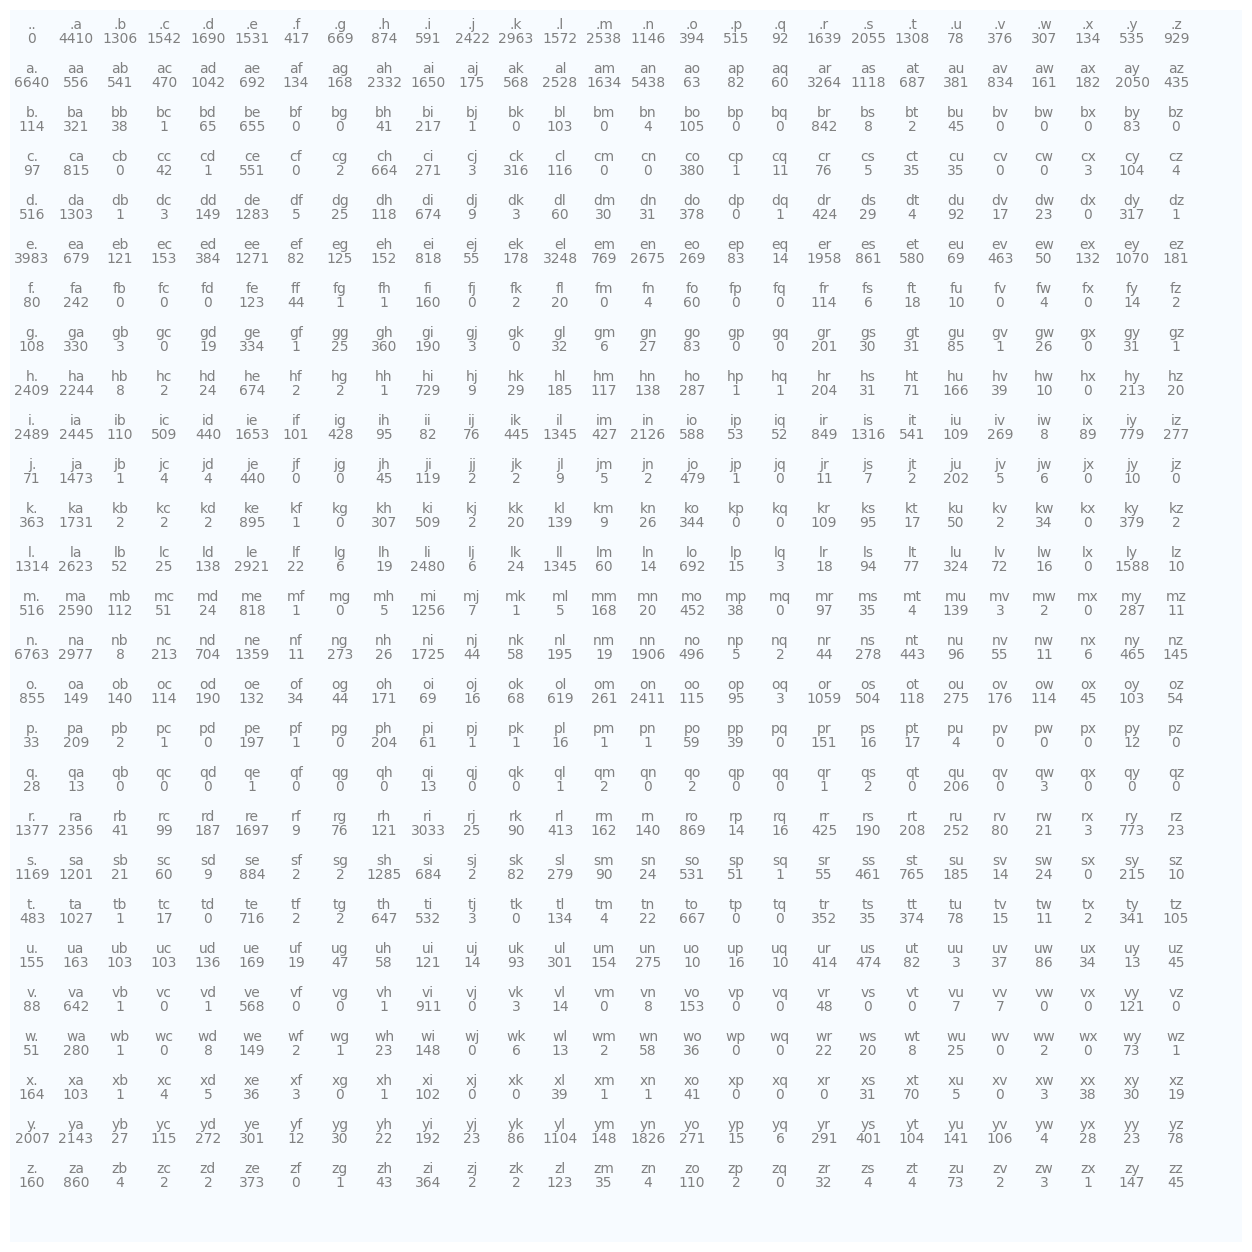

In [49]:
# set figure size
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

# iterate over the array and add the count as text in each cell
for i in range(27):
    for j in range(27):
        chrstr = int_to_char[i] + int_to_char[j]
        # add the text to the cell
        plt.text(j, i, chrstr, ha='center', va='bottom', color='gray')
        # add the count as text to the cell below the text
        plt.text(j, i, N2[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [50]:
# From the 1st row in the matrix where the starting character is ., tells us how often any of the words start with a given character
N2[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [51]:
# Now we will calculate the probabilities for a word to start with the given character
p = N2[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [20]:
# Example of how to generate a random number based on the probabilities
g_ex = torch.Generator().manual_seed(2147483647)
p_ex = torch.rand(3, generator=g_ex)
p_ex = p_ex / p_ex.sum()
print("Probabilties", p_ex)
# to generate samples based on the probabilities we can use the multinomial function
# The multinomial function generates a sample from a multinomial distribution.
torch.multinomial(p_ex, num_samples=100, replacement=True, generator=g_ex)

Probabilties tensor([0.6064, 0.3033, 0.0903])


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [52]:
# Create a probability matrix for the bigrams so we don't have to calculate it for every iteration
# Here we use N2.sum(1) because N2.sum() will give us the total number of bigrams in the dataset.
# The sum will be performed over rows
# Add 1 to avoid 0 probabilities. The bigger number we add the more uniform the distribution will be.
P = (N2 + 1).float()
P /= P.sum(1, keepdim=True)

In [53]:
P[0].sum()

tensor(1.)

In [54]:
# Now we will sample a character index based on the probabilities we generated from the first row of the matrix
# set a manual seed for the random number generator to ensure reproducibility.
# In a trigram model we would sample the first character based on the previous 2 characters.
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    # Start with first index or with the start character
    ix = 0
    out = []
    while True:
        # Loop until end character is sampled.
        p = P[ix]
        # p = N2[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(int_to_char[ix])
        if ix == 0:
            # If we get the end character, break the loop
            break
    print("".join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


### Loss Function
- The loss function evaluates the quality of the model. The lower the value of loss function , the better the model.
- The model assigns probabilities to each of the bigrams in the training set. High probabilities(near 1) mean that the model is correctly predicting what comes next.
- To calculate the overall quality of the model we need to summarize the probabilities for all the bigrams into a single number. This number is called likelihood.
- Likelihood is the product of all the probabilities assigned by the model that we have trained. This means the product of these probabilities or the likelihood should be very high, or as high as possible.
- Since the probabilities are between 0 and 1, their product will be a very small number. So for convenience we will use the log of the likelihood which means we just take the log of the probability.
- log(1) is 0 and as the value decreases from 1 to 0, the log grows more and more negative till -infinity.
- Taking the log of probabilities or likelihood turns it into a sum, which is easier to work with when optimizing the model.
- Ex: log(a*b*c) = log(a) + log(b) + log(c)
- The highest log likelihood can go to is 0, which is when all the probabilities are 1 and when probabilities are lower the log likelihood will grow more and more negative.\
- Since for a loss function, low is good as we are trying to minimize the loss, so we will invert the log likelihood where increasing value is good and decreasing value means the model is not good.
- The inverted version is called as negative log likelihood.
- To normalize the value we can also take the average of the negative log likelihood.
- The job of training is to find the parameters that minimize the negative log likelihood loss.

#### Loss Function Summary
- GOAL: maximize likelihood of data w.r.t model parameters (statistical modelling)
- equivalent to maximizing the log likelihood (because log is monotonic)
- equivalent to minimizing the negative log likelihood
- equivalent to minimizing the average negative log likelihood.

**NOTE**
- We multiply the probabilities for getting an overall likelihood because, for events that happen together, the probability of both happening together is the product of their individual probabilities (i.e. and situations), essentially finding the likelihood of one event occurring and then the other following it, which reduces the overall probability due to the combined restrictions of both events happening together.
- In simple words, when we want to know the probability of event A happening and then event B happening, we multiply their individual probabilities.
- Similarly we add the probabilities when calculating the likelihood of one event occurring or the other occurring (i.e. or situations), where the possibilities are not mutually exclusive and can happen independently.
- In simple words, when we want to know the probability of event A happening or event B happening, we add their individual probabilities.
- We use log to convert the product of probabilities to sum of log probabilities, which makes it easier to work with and optimize the model.


**NOTE to Self**
- Learn Probability theory and Statistics here - https://www.khanacademy.org/math/statistics-probability/probability-library

### Smoothing
- Smoothing is a technique used to handle unseen words in the training data. It is used to assign a small probability to unseen words.
- We will use additive smoothing to handle unseen words. Additive smoothing adds a small value to count of n-grams, which helps prevent zero probabilities.
- This is done because if we have a zero probability for a word, then the negative log likehood will be infinity and the model will not be able to learn anything from it.

In [55]:
log_likelihood = 0.0 # will be the sum of the log probabilities of each bigram in the dataset
n = 0
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        index1 = char_to_int[ch1] 
        index2 = char_to_int[ch2]
        # Now we look at the probabilities that the model assigns to each of the bigrams
        prob = P[index1, index2]
        # Taking the log of the probability will make it easier to compare the probabilities
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")
print(f"{log_likelihood=}")
negative_ll = -log_likelihood
print(f"{negative_ll=}")
print(f"Avg neg log likelihood : {negative_ll/n}")

log_likelihood=tensor(-559951.5625)
negative_ll=tensor(559951.5625)
Avg neg log likelihood : 2.4543561935424805


### Bigram Model using Neural Networks
- The Neural Network will be a bigram character model. It will predict the next character given the previous character.
- This model will predict the probability of the next character given the previous character.
- The model will be trained using the negative log likelihood loss function. The dataset will contain the probabilities for the bigrams, which will be used to calculate the loss.
- If the probability is high, the loss will be low.

### Create the Training set

In [ ]:
# Create the training set of bigrams (x, y) where x is the input character and y is the target character
xs, ys = [], []
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        index1 = char_to_int[ch1] 
        index2 = char_to_int[ch2]
        # Append the number corresponding to the first character to xs or input list
        xs.append(index1)
        # Append the number corresponding to the second character to ys or target list
        ys.append(index2)

# NOTE: Always use torch.tensor not torch.Tensor as it preserves the data type of the original data.
# (see SO threads for the differences)
xs = torch.tensor(xs) 
ys = torch.tensor(ys)
num_elements = xs.nelement()
print("Number of examples in the dataset: ", num_elements)

Number of examples in the dataset:  228146


In [73]:
xs

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [74]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

#### One-Hot Encoding
- One-hot encoding is a technique used to convert categorical data into a numerical format that can be used by machine learning algorithms.
- https://pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html
- https://en.wikipedia.org/wiki/One-hot

In [ ]:
# Since we cannot directly use the integers as input to the model, we need to convert them to one-hot encoded vectors.
# We weill use torch.nn.functional.one_hot to convert the integers to one-hot encoded vectors.
# We will convert the output to float as it returns a boolean tensor by default.

import torch.nn.functional as F

#### Matrix Multiplication (Dot Product)
- To multiply tow matrices, we need to calculate the dot product of the rows of the first matrix with the columns of the second matrix.
- When doing matrix multiplication, the number of columns in the first matrix should be equal to the number of rows in the second matrix.
- The resulting matrix will have the same number of rows as the first matrix and the same number of columns as the second matrix.
- In General : To multiply an m×n matrix by an n×p matrix, the ns must be the same, and the result is an m×p matrix.
$$
(m * n) X (n * p) = m * p
$$
- References:
    - https://en.wikipedia.org/wiki/Matrix_multiplication
    - https://www.mathsisfun.com/algebra/matrix-multiplying.html
    - https://www.mathwarehouse.com/algebra/matrix/multiply-matrix.php

#### Neural Network
- Now we will create a simple neural network that will take the one-hot encoded vector as input and output the probabilities of the next character.
- We will use a simple linear layer with 27 input units and 27 output units, with each input connected to 27 outputs.
- Since probabilities are always positive and sum to 1, and the output of the neural network can be any real number, negative or positive.
- We can also not use counts as the output of the neural network as counts are integers and the output of the neural network can be any real number.
- Instead of counts we get the log-counts or logits as the output of the neural network.
- We will then apply exponential function to the logits, which will convert negative numbers to numbers between 0 and 1 and make positive numbers larger.
- This will be interpreted as counts, which will be equivalent to the N matrix in the bigram count model.

#### Softmax Activation Function
- The softmax function is used to convert the output of the neural network into probabilities.
- It takes a vector of real numbers and converts it into a probability distribution, where the sum of the probabilities is 1.
- This can be used to calculate the log likelihood of the data as well as the negative log likelihood loss.

In [77]:
# ---------- Initialize the Network ------------
# Generator for similar output of W at each run
# set a manual seed for the random number generator to ensure reproducibility. 
g_nn = torch.Generator().manual_seed(2147483647)
# First we will initialize the weights using uniform distribution.
W = torch.randn((27, 27), generator=g_nn, requires_grad=True)

In [70]:
# --------- Forward Pass -------------------
# The x_encoded tensor has a shape of 27x27, and the W tensor has a shape of 27x27.
x_encoded = F.one_hot(xs, num_classes=27).float() # input to the network, one-hot encoding
# The resulting tensor will have a shape of 27x27.
logits = x_encoded @ W # predict log-counts
# The next 2 lines are called as Softmax function
counts = logits.exp() # counts - equivalent to N2
# The probabilities will be the counts divided by the sum of the counts (counts normalized)
probabilities = counts/counts.sum(1, keepdim=True)
loss = - probabilities[torch.arange(5), ys].log().mean()


In [71]:
print(loss.item())

3.2768313884735107


In [ ]:
# ----------- Backward Pass (Backpropagation) --------------------
# Set the gradient to zero before backpropagation
W.grad = None
loss.backward()

In [78]:
# NOTE: A positive gradient means that if we add this gradient to W, the loss will increase.
# So we will multiply the gradient by -0.1 to minimize the loss.
W.data += - 0.1 * W.grad

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [58]:
probabilities[0]

tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])

#### Summary
- We have an input to the neural network and some output labels, for the correct next character in the sequence.
- Then we randomly initialize the weights for 27 neurons, each neuron receives 27 inputs.
- Then we plug the inputs into the neural network using one-hot encoding, also called as forward pass.
- The input is multiplied by the weight matrix to get log counts or logits.
- Then we apply the exponential function to the logits to get the counts, which are then normalized to get the probabilities.
- The probabilities are then compared to the actual labels to calculate the loss.

In [59]:
# --------- Loss Calculation -------------------
# The loss will be calculated using the negative log likelihood.
# We will use the ys tensor to get the probabilities of the target characters.
nlls = torch.zeros(len(ys))
for i in range(len(ys)):
    # ith bigram
    x = xs[i].item()
    y = ys[i].item()

    print("---------")
    print(f"bigram example {i + 1}: {int_to_char[x]}{int_to_char[y]} (indexes {x}, {y})")
    print("input to the neural network: ", x)
    print("output probabilities from the neural net: ", probabilities[i])
    print("Label (actual next character): ", y)
    p = probabilities[i][y]
    print("Probabilities assigned by the neural network to the correct character: ", p.item())
    logp = torch.log(p)
    print("Log Likelihood: ", logp.item())
    nll = -logp
    print("Negative Log Likelihood: ", nll.item())
    nlls[i] = nll

print("---------")
print("Average negative log likelihood, i.e. loss= ", nlls.mean().item())


---------
bigram example 1: .e (indexes 0, 5)
input to the neural network:  0
output probabilities from the neural net:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
Label (actual next character):  5
Probabilities assigned by the neural network to the correct character:  0.01228625513613224
Log Likelihood:  -4.399273872375488
Negative Log Likelihood:  4.399273872375488
---------
bigram example 2: em (indexes 5, 13)
input to the neural network:  5
output probabilities from the neural net:  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
Label (actual next character):  13
Probabilities assigned by the neur

### Training the Model

#### Regualrization Loss


In [81]:
# Gradient Descent

for k in range(100):
    # forward pass
    x_encoded = F.one_hot(xs, num_classes=27).float() # input to the network, one-hot encoding
    logits = x_encoded @ W # predict log-counts
    counts = logits.exp() # counts - equivalent to N2
    probabilities = counts/counts.sum(1, keepdim=True)
    loss = - probabilities[torch.arange(num_elements), ys].log().mean() + 0.01 * (W ** 2).mean()
    print("Loss: ", loss.item())

    # backward pass
    W.grad = None
    loss.backward()
    # The learning rate can be set to a bigger number to speed up the learning process.
    # update weights
    W.data += -  50 * W.grad

Loss:  2.489532470703125
Loss:  2.4893808364868164
Loss:  2.489234209060669
Loss:  2.4890923500061035
Loss:  2.488954544067383
Loss:  2.4888200759887695
Loss:  2.488689422607422
Loss:  2.4885621070861816
Loss:  2.4884371757507324
Loss:  2.4883158206939697
Loss:  2.4881973266601562
Loss:  2.488081455230713
Loss:  2.4879684448242188
Loss:  2.4878580570220947
Loss:  2.4877495765686035
Loss:  2.4876437187194824
Loss:  2.4875404834747314
Loss:  2.4874393939971924
Loss:  2.487340211868286
Loss:  2.4872429370880127
Loss:  2.4871480464935303
Loss:  2.4870553016662598
Loss:  2.4869637489318848
Loss:  2.486874580383301
Loss:  2.4867873191833496
Loss:  2.486701726913452
Loss:  2.4866175651550293
Loss:  2.4865353107452393
Loss:  2.486454725265503
Loss:  2.486375570297241
Loss:  2.4862983226776123
Loss:  2.486222267150879
Loss:  2.486147403717041
Loss:  2.486074209213257
Loss:  2.4860024452209473
Loss:  2.4859323501586914
Loss:  2.485862970352173
Loss:  2.48579478263855
Loss:  2.4857285022735596
Lo

### Generate Samples from trained Neural Network

In [88]:
g_out = torch.Generator().manual_seed(2147483647)

# Generate 5 samples
for i in range(5):
    out = []
    ix = 0
    while True:
        x_enc = F.one_hot(torch.tensor([ix]), num_classes=27).float() # input to the network, one-hot encoding
        logits = x_enc @ W # predict log-counts
        counts = logits.exp() # counts - equivalent to N2
        p = counts/counts.sum(1, keepdim=True)

        # Sample the next character from the above probability distribution
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g_out).item()
        out.append(int_to_char[ix])
        if ix == 0:
            break
    print("".join(out))

junide.
janasah.
prelay.
a.
nn.
